In [20]:
import re
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, f1_score
import sklearn.metrics as metrics
import itertools
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
import time
import itertools

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of unsupervised machine learning analysis.

# Step1 Gather Data

The dataset is from UCI ML data repository(https://archive.ics.uci.edu/ml/datasets/seeds). Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

## 1.1 Import data

In [21]:
file_path = r'E:\Jia\Desktop\MS-DS\5510 Unsupervised Algorithms in Machine Learning\week5\seeds_dataset.txt'
df = pd.read_csv(file_path,sep= '\t', header= None,
                names=['Area','Perimeter','Compactness','LengthOfKernel','WidthOfKernel','AsymmetryCoefficient',
                      'LengthOfKernelGroove','SeedType'])

In [22]:
df

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,SeedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


## 1.2 Inspect null values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           207 non-null    float64
 3   LengthOfKernel        210 non-null    float64
 4   WidthOfKernel         209 non-null    float64
 5   AsymmetryCoefficient  210 non-null    float64
 6   LengthOfKernelGroove  206 non-null    float64
 7   SeedType              206 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


This dataset includes 210 rows and 8 columns. According to df.infor(), I noticed there exists null values in the Compactness, WidthOfKernel, LengthOfKernelGroove and SeedType columns.

In [24]:
df.isnull().sum()

Area                    0
Perimeter               0
Compactness             3
LengthOfKernel          0
WidthOfKernel           1
AsymmetryCoefficient    0
LengthOfKernelGroove    4
SeedType                4
dtype: int64

Complete case analysis is to drop any observations (rows) that have null values. It is suitable if the number of observations with null values are very small (say, less than 5%) compared to the total number of observations.

## 1.3 Deal with missing data

In [25]:
df = df.dropna()

In [26]:
df

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,SeedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


After cleaning missing data, the dataset convert to 199 rows and 8 columns.

In [27]:
X = df.drop('SeedType', axis=1)
Y = df.iloc[:,-1]

In [28]:
X

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [29]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
205    3.0
206    3.0
207    3.0
208    3.0
209    3.0
Name: SeedType, Length: 199, dtype: float64

# Step 2 Visualizing Data Analysis

##  Plot the distribution of each feature

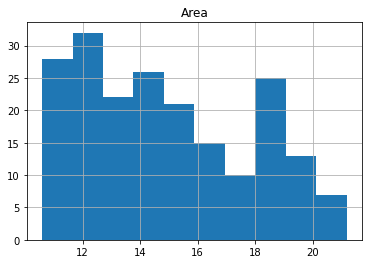

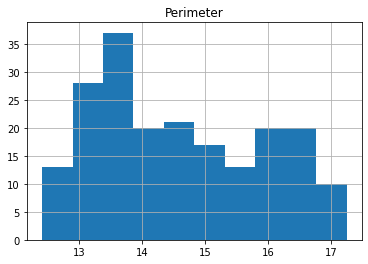

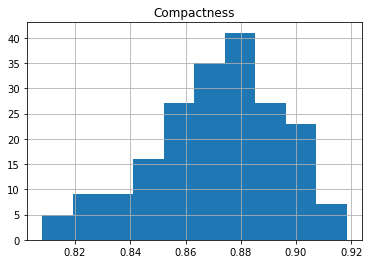

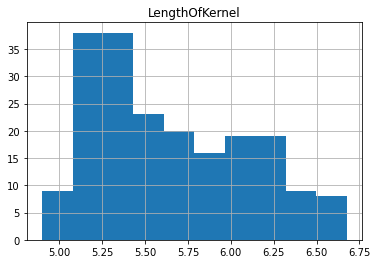

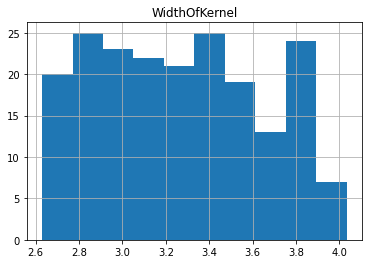

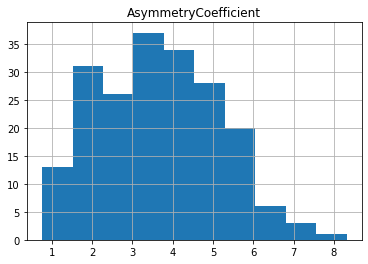

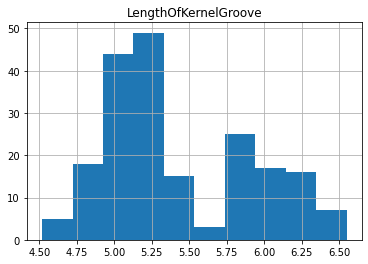

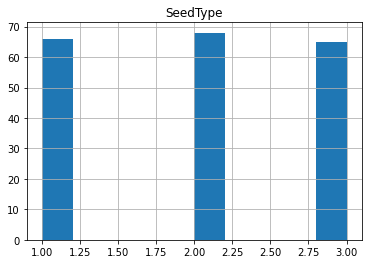

In [30]:
df = df.loc[:, df.columns != 'No']
for i in df.columns:
    df[i].hist()
    plt.title(i)
    plt.show()

In [31]:
df.describe()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,SeedType
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


<AxesSubplot:>

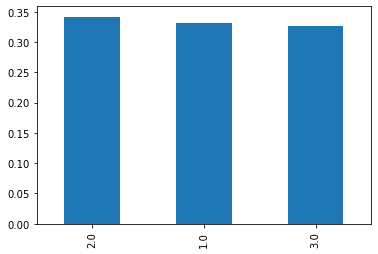

In [32]:
df['SeedType'].value_counts(normalize=True).plot.bar()

We can see that overall we have about even number of seeds for each type. This is good because if one or two categories was severely underrepresented or, in contrast, overrepresentation in the data, then it may cause our model to be biased and/or perform poorly on some or all of the test data.

# Step 3 Exploratory Data Analysis

## 3.1 Get correlation matrix

In [33]:
corr = X.corr()
corr

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016
LengthOfKernel,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124
WidthOfKernel,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228
AsymmetryCoefficient,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349
LengthOfKernelGroove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000


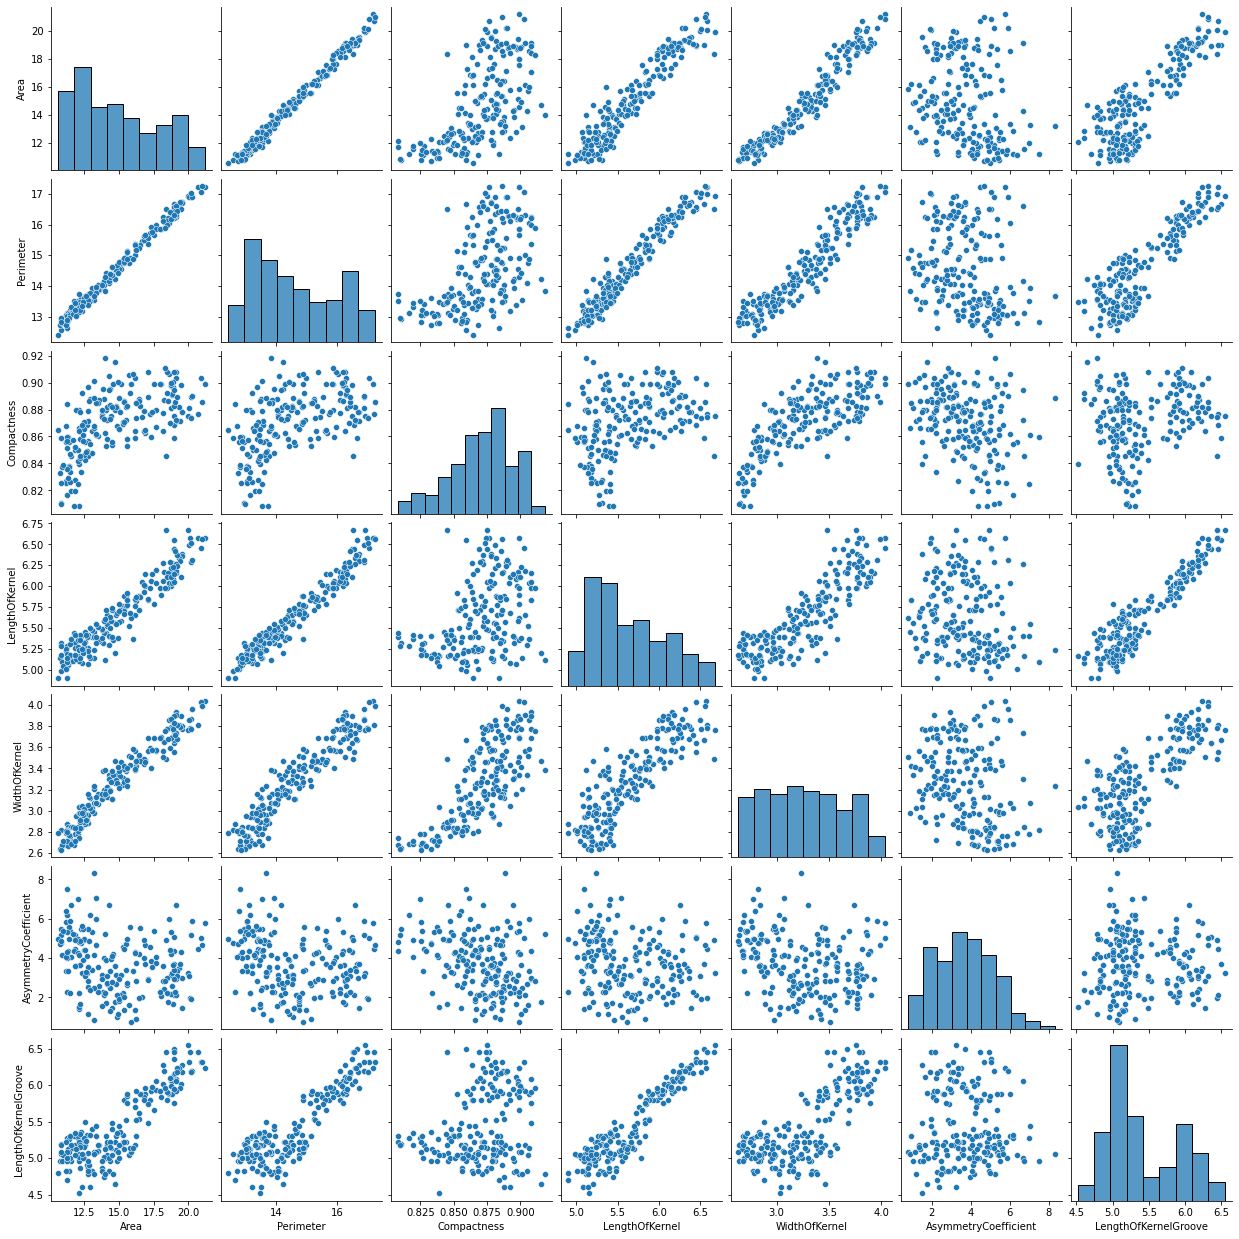

In [34]:
sns.pairplot(X)

We can see from the above graphs that Area, Perimeter, LengthOfKernel and WidthOfKernel have similar distributions and linear relationship.

Let's check using a correlation heat map.

## 3.2 Display the correlation matrix as heat map

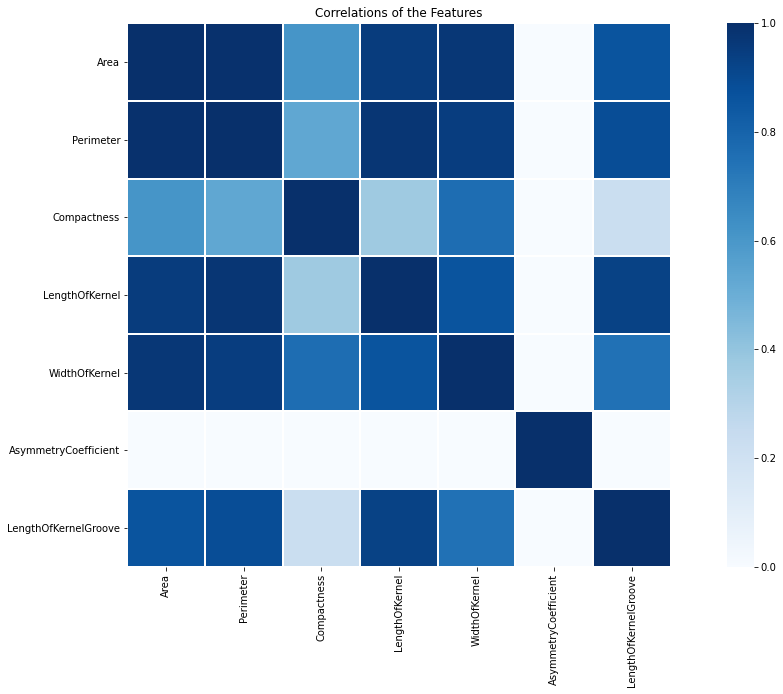

In [35]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, cbar=1, linewidths=1, vmax=1, vmin=0, square=True, cmap='Blues',fmt='.4f',annot_kws={"frontsize":100})
plt.yticks(rotation=0)
plt.title("Correlations of the Features")
plt.show()

From the above heatmap, we can tell that only AsymmetryCoefficient has negative correlation and it is the only feature which is different from other variables.

## 3.3 Kmeans clustering

### 3.3.1 Kmeans model

C:\Users\Wenbo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

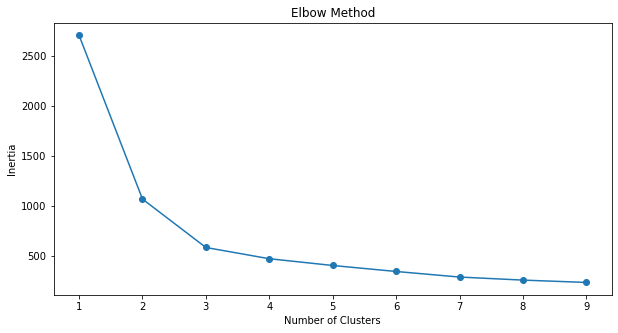

In [36]:
inertia  = []
for i in range(1,10):
    model = KMeans(n_clusters = i)
    model.fit(df)
    inertia.append(model.inertia_)
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(np.arange(1,10), inertia, marker='o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.title('Elbow Method')

Based on result, 3 is the optimal number of clusters. After k=3, increasing the number of K does not result in a considerable decrease of the total within sum of squares.

### 3.3.2 Split dataset
The dataset is divided into a test set and a training set by a 80 to 20 split.

In [37]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=123)

In [38]:
X_train

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove
197,13.37,13.78,0.8849,5.320,3.128,4.670,5.091
34,15.05,14.68,0.8779,5.712,3.328,2.129,5.360
24,15.01,14.76,0.8657,5.789,3.245,1.791,5.001
188,11.23,12.82,0.8594,5.089,2.821,7.524,4.957
43,15.50,14.86,0.8820,5.877,3.396,4.711,5.528
...,...,...,...,...,...,...,...
18,14.70,14.21,0.9153,5.205,3.466,1.767,4.649
102,19.46,16.50,0.8985,6.113,3.892,4.308,6.009
70,17.63,15.98,0.8673,6.191,3.561,4.076,6.060
131,18.94,16.32,0.8942,6.144,3.825,2.908,5.949


In [39]:
Y_train

197    3.0
34     1.0
24     1.0
188    3.0
43     1.0
      ... 
18     1.0
102    2.0
70     2.0
131    2.0
114    2.0
Name: SeedType, Length: 159, dtype: float64

Because k-means do not knows correct the identity of the cluster, labels 0-2 may be permuted. Fix every learned cluster label with the true labels found in them:

### 3.3.3 Calculate accuracy for original data

In [40]:
def label_permute_compare(yp,n=3):
    permutations = list(itertools.permutations(list(range(n))))
    acc = []
    for i in range(len(permutations)):
        mapdict = dict(zip(list(df['SeedType'].unique()),list(permutations[i])))
        yt = Y_train.apply(lambda x : mapdict[x])
        acc.append(accuracy_score(yt,yp))
    idx = np.argmax(acc)    
    return permutations[idx], acc[idx]

In [41]:
kmeansmodel1 = KMeans(n_clusters = 3, random_state=11111)
kmeansmodel1.fit(X_train)

KMeans(n_clusters=3, random_state=11111)

In [42]:
labelorder, acc = label_permute_compare(kmeansmodel1.labels_)
labelorder, acc

((0, 1, 2), 0.9119496855345912)

In [43]:
# from sklearn.metrics import confusion_matrix,classification_report
# print(confusion_matrix(Y_train,kmeansmodel1.labels_))
# print(classification_report(Y_train,kmeansmodel1.labels_))

###  3.3.4 Standardize data

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.fit_transform(x_test)

In [45]:
X_train_scaled

array([[-5.84280899e-01, -6.67997951e-01,  5.52755055e-01, ...,
        -4.32079552e-01,  7.13054390e-01, -6.56312503e-01],
       [ 7.66571634e-04,  2.48374972e-02,  2.38420099e-01, ...,
         1.15554157e-01, -1.01713033e+00, -1.22000645e-01],
       [-1.31631301e-02,  8.64228704e-02, -3.09420825e-01, ...,
        -1.11713832e-01, -1.24727690e+00, -8.35078553e-01],
       ...,
       [ 8.99232330e-01,  1.02559981e+00, -2.37572835e-01, ...,
         7.53547428e-01,  3.08595623e-01,  1.26840196e+00],
       [ 1.35543006e+00,  1.28733765e+00,  9.70371497e-01, ...,
         1.47642392e+00, -4.86703768e-01,  1.04792383e+00],
       [ 2.06236242e+00,  2.00326761e+00,  5.97660049e-01, ...,
         1.93095990e+00,  7.17820739e-01,  1.77689205e+00]])

### 3.3.5 Calculate accuracy for standardized data

In [46]:
kmeansmodel2 = KMeans(n_clusters = 3, random_state=11111)
kmeansmodel2.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=11111)

In [47]:
labelorder, acc2 = label_permute_compare(kmeansmodel2.labels_)
labelorder, acc2

((2, 1, 0), 0.9245283018867925)

###  3.3.6 Optimize the model

In [48]:
for init in ['k-means++','random']:
    for algorithm in ['lloyd', 'elkan', 'auto', 'full']:
        acc=0
        t0=time.time()
        try:
            kmeans = KMeans(n_clusters=3, 
                            init=init, 
                            algorithm=algorithm,random_state=11111).fit(X_train_scaled)
            labelorder, acc = label_permute_compare(kmeans.labels_)
            t1=time.time()
            print(t1-t0, init, algorithm, labelorder, acc)
        except:
            print(init,'with',algorithm, 'is not accepted')
            

k-means++ with lloyd is not accepted
0.026991844177246094 k-means++ elkan (2, 1, 0) 0.9245283018867925
0.02497577667236328 k-means++ auto (2, 1, 0) 0.9245283018867925


C:\Users\Wenbo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.27636241912841797 k-means++ full (2, 1, 0) 0.9245283018867925
random with lloyd is not accepted
0.0219879150390625 random elkan (0, 2, 1) 0.9119496855345912
0.020987272262573242 random auto (0, 2, 1) 0.9119496855345912


C:\Users\Wenbo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.31781792640686035 random full (0, 2, 1) 0.9119496855345912


In [62]:
kmeansmodel_best = KMeans(n_clusters = 3, 
                          init = 'k-means++',
                          algorithm = 'auto',random_state=11111)
kmeansmodel_best.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=11111)

In [63]:
labelorder, acc3 = label_permute_compare(kmeansmodel_best.labels_)
labelorder, acc3

((2, 1, 0), 0.9245283018867925)

###  3.3.7 Apply kmeans model in the testing dataset

In [51]:
def label_permute_compare_test(yp, n=3):
    permutations = list(itertools.permutations(list(range(n))))
    acc = []
    for i in range(len(permutations)):
        mapdict = dict(zip(list(df['SeedType'].unique()),list(permutations[i])))
        yt = y_test.apply(lambda x : mapdict[x])
        acc.append(accuracy_score(yt,yp))
    idx = np.argmax(acc)    
    return permutations[idx], acc[idx]

In [64]:
kmeansmodel3 = KMeans(n_clusters = 3, 
                      init = 'k-means++',
                      algorithm = 'auto',random_state=11111)
kmeansmodel3.fit(x_test_scaled)

KMeans(n_clusters=3, random_state=11111)

In [65]:
labelorder, acc3 = label_permute_compare_test(kmeansmodel3.labels_)
labelorder, acc3

((2, 0, 1), 0.85)

##  3.4 PCA model

PCA is a method where the data are projected to a subspace spanned by the eigenvectors of the covariance matrix of the centered data. By using the eigenvectors, the variance of the projected data along the direction of the eigenvectors is maximized, and the variance along each eigenvector is equal to its associated eigenvalue. Furthermore, the eigenvectors are orthogonal to each other, and the sum of the eigenvalues is equal to the sum of the variances.

In this case, PCA is applied to the measurements of wheat kernels in order to reduce dimensions.

Text(0, 0.5, 'cumulative explained variance')

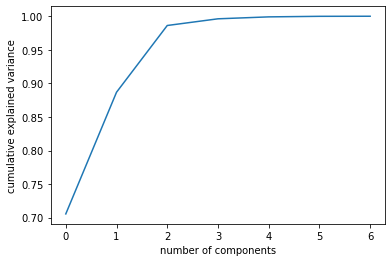

In [56]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [57]:
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_)

[0.70556392 0.18123882 0.09941664]


It can be seen that first principal component is responsible for 70.56% variance. Similarly, the second principal component causes 18.12% variance in the dataset. Collectively we can say that (70.56+18.12+9.94) 98.62% percent of the classification information contained in the feature set is captured by the first three principal components.

We can cluster them as shown in the 2D plot

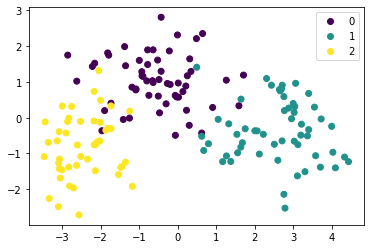

In [58]:
df_pca = pca.fit_transform(X_train_scaled)
plot = plt.scatter(df_pca[:,0], df_pca[:,1], c=Y_train)
plt.legend(handles=plot.legend_elements()[0], labels=[0,1,2])
plt.show()

##  3.5 Hierarchical clustering

Hierarchical clustering is an unsupervised learning algorithm used to create the clusters based on hierarchical ordering
There are two different types of hierarchical clustering algorithm – Agglomerative clustering and Divisive clustering
In agglomerative hierarchical clustering, clustering starts from individual points and clusters are formed upward until one cluster – root cluster remains. It is also called as bottom-up hierarchical clustering.

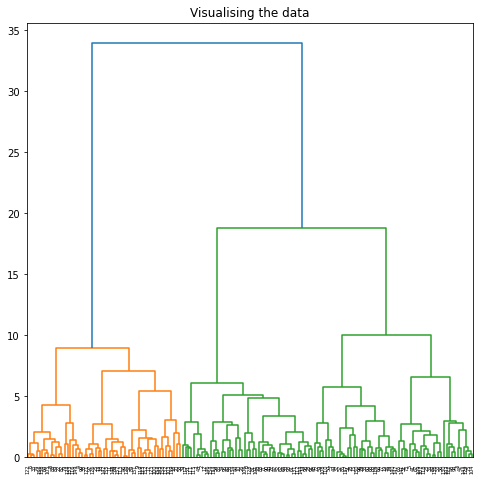

In [59]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))

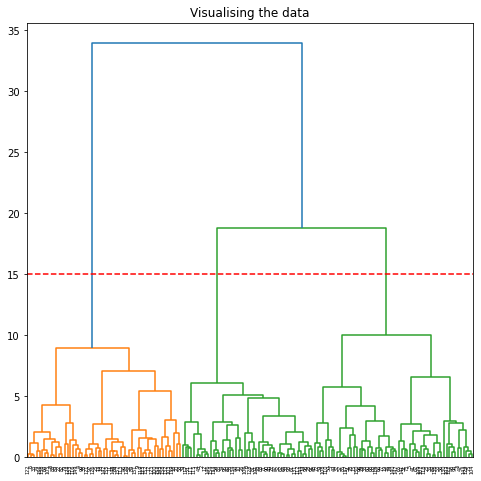

In [60]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))
plt.axhline(y=15, color='r', linestyle='--')

We have three clusters as this line cuts the dendrogram at three points. Let’s now apply hierarchical clustering for 3 clusters:

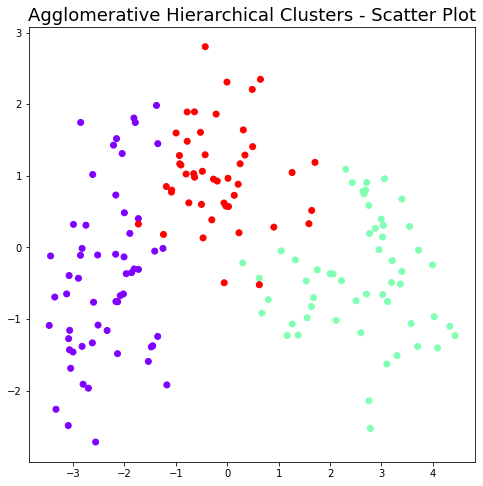

In [61]:
df_pca = pd.DataFrame(df_pca)
agc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca[0], df_pca[1], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

# Step 4 Results and Analysis

1. I am studying the seeds dataset, this dataset includes 210 rows and 8 columns, there exists null values in the  Compactness, WidthOfKernel, LengthOfKernelGroove and SeedType columns. After cleaning missing data, the dataset converts to 199 rows and 8 columns.


2. We can see that overall we have about even number of seeds for each type. This is good because if one or two categories was severely underrepresentated or, in contrast, overrepresentative in the data, then it may cause our model to be biased and/or perform poorly on some or all of the test data.


3. According to correlation matrix, we can see from the above graphs that Area, Perimeter, LengthOfKernel and WidthOfKernel have similar distributions and linear relationship. From the heatmap, we can tell that only AsymmetryCoefficient is different from other variables.


4. I applied three different unsupervised methods in this dataset, which inclued Kmeans clustering, PCA model and Hierarchical clustering.

(1) In Kmeans clustring, I used elbow method to find k, the optimum value is 3, because it has the most reduction of distortion here, and then if I have more clusters, it does not reduce the distortion every much. I split the dataset in to training data which is 80% of observation and the rest 20% ids testing data.  I compare the accuracy for the original data and standardized data, after applying original data in kmeans fuction, the result of accuracy is 0.912. On the other hand, the reslut of accuray reach to 0.925 when analysing in standardized data. Next step, I optimized my kmeans model by hyperparameter tuning, the best model would be n_clusters = 3, init = 'k-means++', and algorithm = 'elkan', the value of accuray is 0.925. Last, I appled kmeans model in testing dataset. the value of accuracy is 0.85.

(2) In PCA model, it is applied to the measurements of wheat kernels in order to reduce dimensions. It can be seen that first principal component is responsible for 70.56% variance. Similarly, the second principal component causes 18.12% variance in the dataset. Collectively we can see that (70.56+18.12+9.94) 98.62% percent of the classification information contained in the feature set is captured by the first three principal components.

(3) Last I tried the Hierachical clustering model to analyze the dataset, in this model, the  ward minimum  variance method was be used.

# Step 5 Discussion and Conclusion

In this study, I practiced cleaning the data, used correlation coefficient matrix and heatmap to analyze data. I split datsset into training data wihch is 80% of observation and the rest 20% is testing data, and I used StandardScaler fuction to standardize data.

I applied three different unsupervised methods in this dataset. In kmeans model, the optimum k is equal to 3, the performance of  standardized dats is better than original dataset based on accuray value, and I optimized my kmeans model by hyperparameter tuning. In PCA model, 98.62% percent of the classification information contained in the feature set is captured by the first three principal components.

In the furture, I would like to pay more attantion on Hierachical clustering, try different type of linkage such as complete linkage clustering, single linkage clustering, average linkage clustering and centroid linkage clustering.
